# **Global AI Hub Machine Learning Bootcamp - Movie Prediction using Machine Learning Regression Algorithms**

# 1 - Importing required Libraries

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import os
warnings.filterwarnings("ignore")

# 2 - Loading Data from Kagglehub

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tmdb/tmdb-movie-metadata")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/tmdb-movie-metadata


In [4]:
# Paths do data:
# movies_path = "/root/.cache/kagglehub/datasets/tmdb/tmdb-movie-metadata/versions/2/tmdb_5000_movies.csv"
# credits_path = "/root/.cache/kagglehub/datasets/tmdb/tmdb-movie-metadata/versions/2/tmdb_5000_credits.csv"

movies_path = "/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv"
credits_path = "/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv"

# Read .csv files using Pandas
movies = pd.read_csv(movies_path)
credits = pd.read_csv(credits_path)

# 3 - Exploratory Data Analysis (EDA)

In [5]:
# Take a look to the first 5 columns of the dataset

movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
# Dataset shape and data types

movies.shape, movies.dtypes

((4803, 20),
 budget                    int64
 genres                   object
 homepage                 object
 id                        int64
 keywords                 object
 original_language        object
 original_title           object
 overview                 object
 popularity              float64
 production_companies     object
 production_countries     object
 release_date             object
 revenue                   int64
 runtime                 float64
 spoken_languages         object
 status                   object
 tagline                  object
 title                    object
 vote_average            float64
 vote_count                int64
 dtype: object)

Here we can see that our data consists of 4803 rows of data entries and 20 columns of different categories. Also we mostly have categorical data which are marked as ```object```.

We probably have to convert some numerical data to categorical or some categorical data to numerical to get the best performance out of this data.

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

After a quick info view we can consider that the most ```Null``` values are in ```homepage``` and ```tagline```. We have to clean all Null values from outr dataset and some of these columns are completely unnecessary for the model training so we will delete them completely.

## 3.1 - Missing Data Analysis

In [8]:
# Null calues in each column

movies.isna().sum().sort_values(ascending=False)

,0
homepage,3091
tagline,844
overview,3
runtime,2
release_date,1
id,0
budget,0
genres,0
original_title,0
popularity,0


After a quick analysis we can determine that we have **3091** Null entries in ```homepage```, **844** in ```tagline```, **3** in ```overview```, **2** in ```runtime``` and **1** in ```release_date```.

In [9]:
# Percentage of Null values in each column
(movies.isna().mean() * 100).round(2).sort_values(ascending=False)

,0
homepage,64.36
tagline,17.57
overview,0.06
runtime,0.04
release_date,0.02
id,0.00
budget,0.00
genres,0.00
original_title,0.00
popularity,0.00


## 3.2 Basic Statistics & Target Distribution

In [10]:
# Statistics of numerical data

movies.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


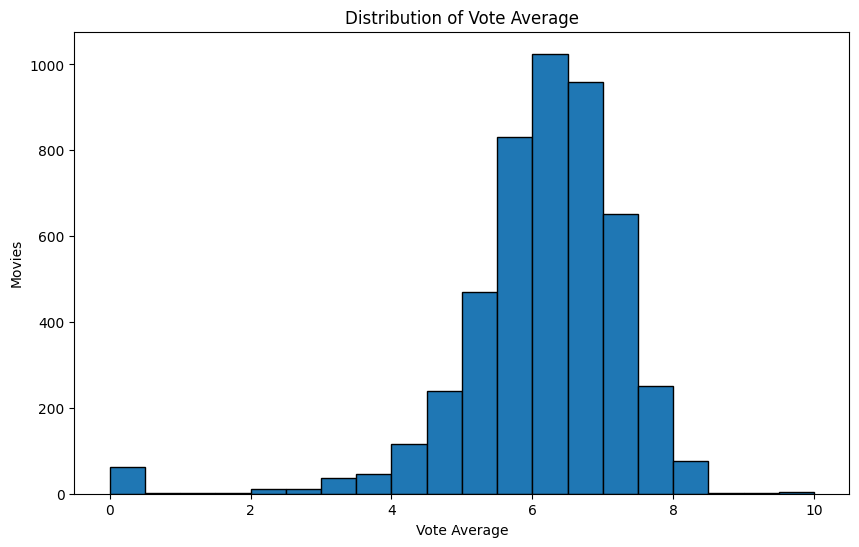

In [11]:
# Target data: Distribution of vote_average

plt.figure(figsize=(10, 6))
plt.hist(movies['vote_average'], bins=20, edgecolor='black')
plt.xlabel('Vote Average')
plt.ylabel('Movies')
plt.title('Distribution of Vote Average')
plt.show()

## 3.3 - Outlier Data & Distribution Analysis

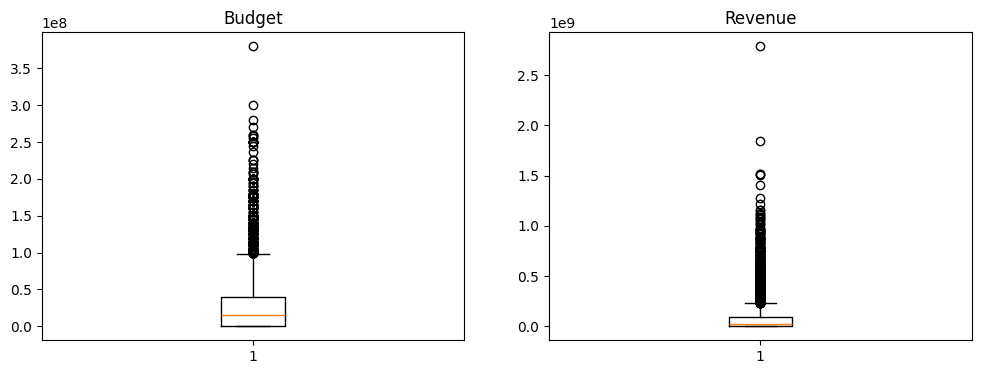

In [12]:
# Visualizing budget & revenue with boxplot

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].boxplot(movies['budget'])
ax[0].set_title('Budget')
ax[1].boxplot(movies['revenue'])
ax[1].set_title('Revenue')
plt.show()

### Log Tranformation using ```np.log1p()```

Here we have to log transform the ```budget``` and ```revenue``` data using ```np.log1p()```.

The np.log1p function computes log⁡e(1+x)\log_e(1 + x)loge​(1+x), where xxx is the input. This function is particularly useful when xxx is close to zero, preventing numerical accuracy issues that can occur when directly computing log⁡(1+x)\log(1 + x)log(1+x) for small xxx.

Its usage is commonly used for computations involving small values or in scenarios where transformation of skewed data (like when dealing with highly skewed distributions in data preprocessing) is necessary.

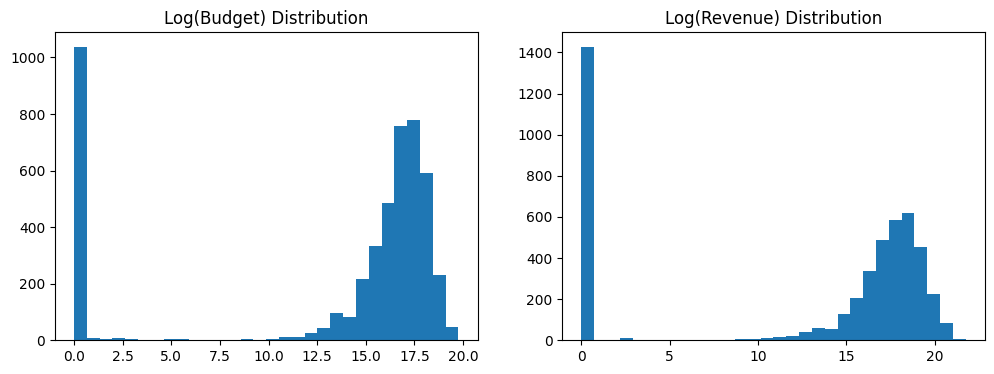

In [13]:
# Distribution after Log transformation
import numpy as np

movies['log_budget']  = np.log1p(movies['budget'])
movies['log_revenue'] = np.log1p(movies['revenue'])

fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(movies['log_budget'], bins=30)
axes[0].set_title('Log(Budget) Distribution')
axes[1].hist(movies['log_revenue'], bins=30)
axes[1].set_title('Log(Revenue) Distribution')
plt.show()


## 3.4 - Categorical Features - Analysis of "Genres"

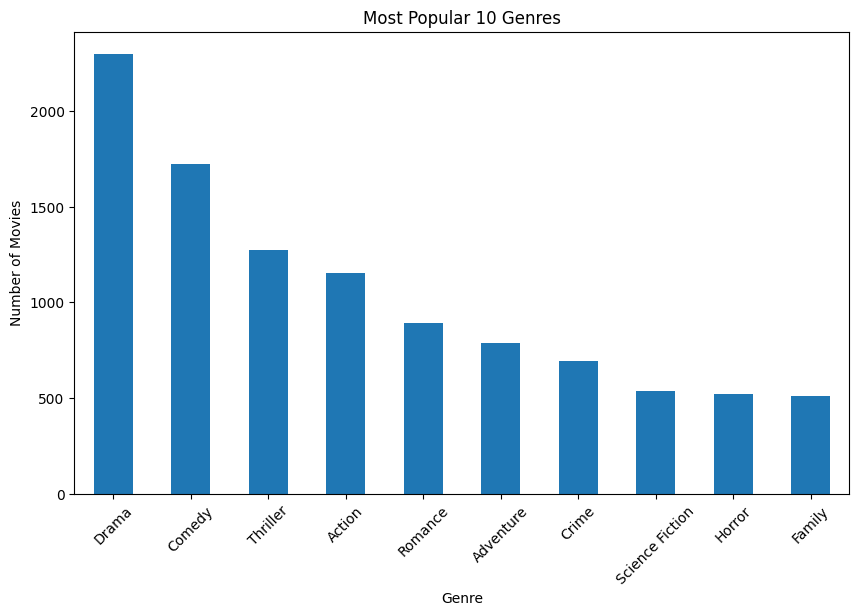

In [ ]:
# Exploding "genres" column to determine most popular genre
import ast

# 1) Filling NaN or empty stings with'[]'
movies['genres_clean'] = movies['genres'].fillna('[]')

# 2) Parsing JSON text to extract names only
def extract_genre_names(genres_str):
  try:
    genres_list = ast.literal_eval(genres_str)
    # If literal_eval returns a list, extract the names from the dictionary
    return [genre.get('name') for genre in genres_list]
  except (ValueError, SyntaxError, TypeError):
    # Return empty list for faulty or not parsed entries
    return []

# 3) List all genres in new column
movies['genres_list'] = movies['genres_clean'].apply(extract_genre_names)

# 4) Explode all genres to seperate columns
genres_expanded = movies.explode('genres_list')

# 5) Visualize top 10 most popular genres
top_genres = genres_expanded['genres_list'].value_counts().head(10)

top_genres.plot(kind='bar', figsize=(10, 6))
plt.title('Most Popular 10 Genres')
plt.ylabel('Number of Movies')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()

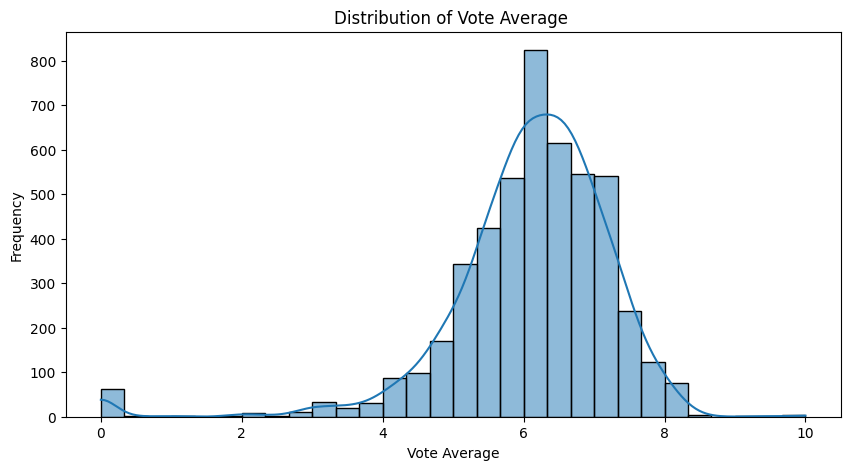

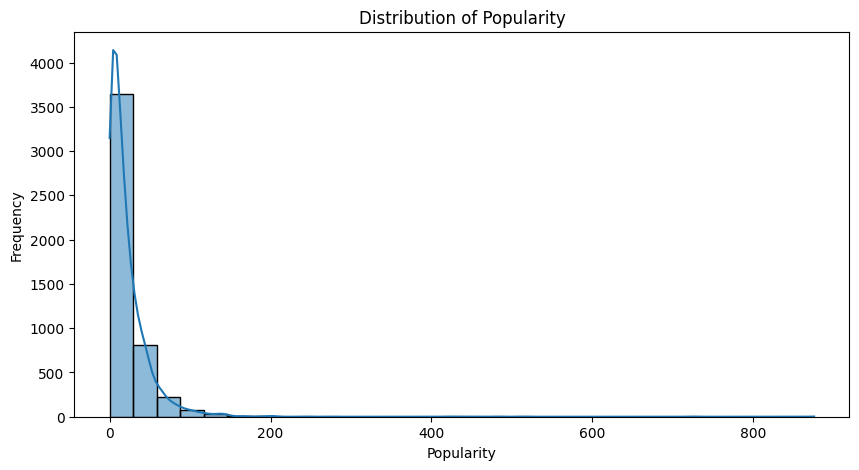

In [ ]:
# Average vote distribution:
plt.figure(figsize=(10,5))
sns.histplot(movies['vote_average'], bins=30, kde=True)
plt.title("Distribution of Vote Average ")
plt.xlabel("Vote Average")
plt.ylabel("Frequency")
plt.show()

# Popularity distribution:
plt.figure(figsize=(10,5))
sns.histplot(movies['popularity'], bins=30, kde=True)
plt.title("Distribution of Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

## 3.5 Correlation Analysis

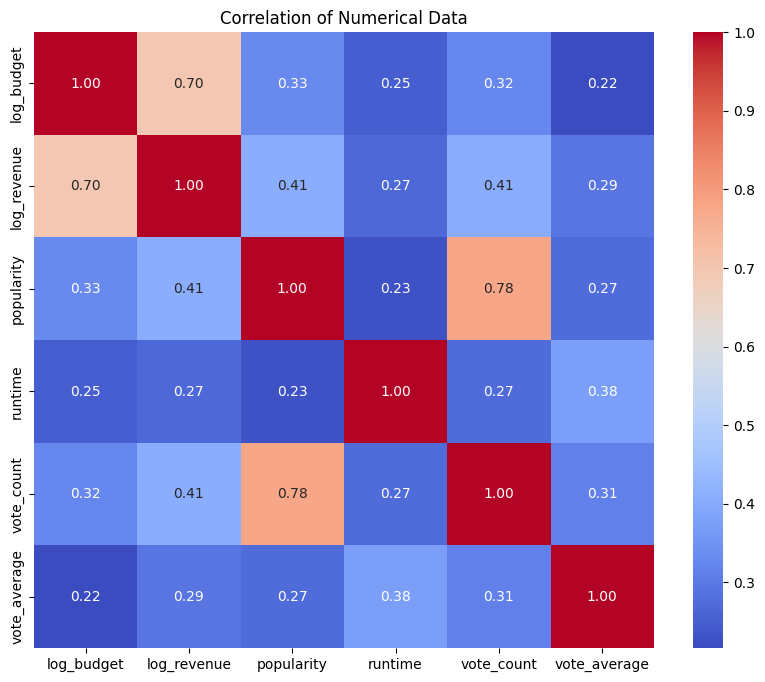

In [ ]:
# Correlation matrix of numerical data

numerical_cols = ['log_budget', 'log_revenue', 'popularity', 'runtime', 'vote_count', 'vote_average']
corr = movies[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation of Numerical Data')
plt.show()

**NOTE**: EDA for the ```credits``` dataset is not as neccessary as for the ```movies``` dataset because the ```credits``` includes information about ```crew``` and ```cast```. Because of that this is not necessary for the model training but it could be usable for feature engineering. Therefore, we keep the EDA short for this one.

In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [ ]:
# Missing Data Analysis
credits.isna().sum()

,0
movie_id,0
title,0
cast,0
crew,0


# 4 - Data Preprocessing

This is the most important part before building and training the Machine Learning model. In Data Preprocessing we prepare our data for model training by dropping Null or missing data from our dataset. Sometimes we can fill missing data with the mean of the column if it would not effect the result too much (If it effects it possitively).

First of all we copy our original movies dataset so we do not effect the original values

In [ ]:
# Copying the original dataset

df = movies.copy()

In [ ]:
# parsing the 'genres' column from JSON-like strings into a list
def parse_genres(genres_str):
  """
  Try to convert a JSON-like string of genres into a list of genre names.
  Returns an empty list if parsing fails.
  """
  try:
    genres_list = ast.literal_eval(genres_str)
    return [genre['name'] for genre in genres_list]
  except (ValueError, SyntaxError, TypeError):
    return []

# Fill NaNs with empty list string and apply parser
df['genres_parsed'] = df['genres'].fillna('[]').apply(parse_genres)
print(df['genres_parsed'].head())

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
Name: genres_parsed, dtype: object


### Why MultiLabelBinarizer?

- Every movie can be able to belong to more genres than only one so because it is "multi-labeled" than we open seperate columns for every genre.
- ```MultiLabelBinarizer``` acts as a list of a list. It turns every genre entries to 0s and 1s and assigns them to each genre column seperately. This makes the training with genres possible.

In [ ]:
# One-hot encode the parsed genres
mlb = MultiLabelBinarizer()

# Fit-transform on our list-of-lists
genre_dummies = mlb.fit_transform(df['genres_parsed'])

# Build a DataFrame of genre columns, then concat back
genre_df = pd.DataFrame(genre_dummies, columns=mlb.classes_, index=df.index)
df = pd.concat([df, genre_df], axis=1)


In [ ]:
# Log-transform 'budget' and 'revenue' to reduce skewness
df['log_budget']  = np.log1p(df['budget'])
df['log_revenue'] = np.log1p(df['revenue'])

### Why StandardScaler?

- Every data can be in different sizes. One can be in the tens and the other in the thousands.
- Most regression algorithms (especially distance-based or gradient-based methods) can be trained faster and more stable when scaled.
- So, the ```StandardScaler``` scales every data that the mean value is ```0``` and the standard deviation is ```1```.

In [ ]:
# Handle missing values and scale numeric features
numeric_features = ['popularity', 'vote_count', 'runtime', 'log_budget', 'log_revenue']

# Fill any remaining NaNs in numeric columns with the column median
for col in numeric_features:
    df[col].fillna(df[col].median(), inplace=True)

# Scale to zero mean / unit variance
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
# Prepare feature matrix X, target y, and train/test split
# Combine scaled numeric features with one-hot genre columns
X = df[numeric_features + list(mlb.classes_)]
y = df['vote_average']  # Our regression target

# Hold out 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:    ", X_test.shape)

Training set shape: (3842, 25)
Test set shape:     (961, 25)


# 5 - Model Training

For building and training the model there is no 'the right way' for doing this. I will use LineaRegression, RandomForestRegressor, GradientBoostingRegressor and XGBRegressor through trial and error to determine the best model.

In [ ]:
# Instantiate & train models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, eval_metric='rmse', use_label_encoder=False)
}

# Fit each model on the training data
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Linear Regression trained.
Random Forest trained.
Gradient Boosting trained.
XGBoost trained.


In [ ]:
# Evaluate on test set and collect metrics
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse  = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_test, y_pred)
    r2   = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2})

# Build a DataFrame for easy comparison
results_df = pd.DataFrame(results).set_index('Model')
print(results_df)

                        MAE       MSE      RMSE        R2
Model                                                    
Linear Regression  0.678936  1.063918  1.031464  0.294408
Random Forest      0.504445  0.512907  0.716175  0.659839
Gradient Boosting  0.499291  0.481972  0.694242  0.680356
XGBoost            0.530017  0.565621  0.752078  0.624879


# 6 - Hyperparameter Optimization

### Info about Hyperparameter Optimization

1. Target Model Selection
  - Since GradientBoostingRegressor gives the best output, we will focus on it.

2. Determining Important Hyperparameters

  - ```n_estimators``` (number of trees)

  - ```learning_rate``` (weight of each tree contribution)

  - ```max_depth``` (maximum depth of each tree)

  - ```subsample``` (what fraction of the data to use in each tree)

  - ```min_samples_split``` and ```min_samples_leaf``` (branching criteria)

  - (optional) ```max_features```

3. Search Method Selection

  - **RandomizedSearchCV**: Ideal for fast exploration in a time-constrained or large parameter space.

  - **GridSearchCV**: For testing all combinations in a smaller, very focused grid.

  - **Bayesian Optimization (Optuna, scikit-optimize)**: Intelligently narrows the space by learning from previous attempts, can produce better results with fewer attempts.

4. Cross-Validation and Scoring

  - 5-fold validation with ```cv=5``` or ```cv=3```

  - ```neg_mean_squared_error``` or ```r2``` as scoring metric

5. Early Stopping

  - Setting ```n_estimators``` very high and using early stopping with ```validation_fraction=0.1``` and ```n_iter_no_change=10``` will both prevent overfitting and save time.


### Step-by-Step Approach in this notebook

Step 1: Coarse screening with a large ```RandomizedSearchCV``` (e.g. 50–100 iterations).

Step 2: ```GridSearchCV``` with a small grid around the best performing parameters.

## 6.1 - RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter distributions
param_dist = {
    'n_estimators': [100, 300, 500, 800, 1200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Base estimator
gb = GradientBoostingRegressor(random_state=42)

# Randomized search
rand_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=50, # number of parameter settings sampled
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Run search
rand_search.fit(X_train, y_train)

print("Best parameters:", rand_search.best_params_)
print("Best CV RMSE:", np.sqrt(-rand_search.best_score_))

Best parameters: {'subsample': 0.8, 'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.01}
Best CV RMSE: 0.7318389640089924


## 6.2 - GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Base estimator
gb = GradientBoostingRegressor(random_state=42)

# Narrow grid around the best params
param_grid = {
    'n_estimators': [600, 800, 1000],             # ±200
    'learning_rate': [0.005, 0.01, 0.02],         # step 0.005
    'max_depth': [4, 5, 6],                       # ±1
    'subsample': [0.7, 0.8, 0.9],                 # ±0.1
    'min_samples_split': [2, 3, 4],               # ±1
    'min_samples_leaf': [3, 4, 5],                # ±1
    'max_features': ['sqrt', 'log2']              # two alternatives
}

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Grid params:", grid_search.best_params_)
print("Best CV RMSE:", np.sqrt(-grid_search.best_score_))

Best Grid params: {'learning_rate': 0.01, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 1000, 'subsample': 0.7}
Best CV RMSE: 0.7249745157281348


### 4. Cross-Validation and Ensembling

- K-Fold Ensembling
  
  - For example, in a 5-fold CV, training a separate model for each fold and averaging the test estimate over the folds usually gives more stable results than a single model.
  - Reduces model variance, generally giving more stable performance than a single model.

- Bagging Stacking
  
  - Using bagging (random subsampling) versions of different algorithms together.
  - It combines the strengths of different model families and provides much higher accuracy with the right choice of meta-learner.

## 6.3 - K-Fold Bagging (Ensembling)

In [ ]:
from sklearn.model_selection import KFold

gb_base = GradientBoostingRegressor(
    random_state=42,
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.7,
    min_samples_leaf=5,
    min_samples_split=2
)

In [ ]:
# KFold setup & training
kf = KFold(n_splits=5, shuffle=True, random_state=42)
test_preds = np.zeros(len(X_test))

for fold, (tr_idx, val_idx) in enumerate(kf.split(X_train)):
    X_tr, y_tr = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    X_val, y_val = X_train.iloc[val_idx], y_train.iloc[val_idx]

    # Train on fold
    gb = gb_base.fit(X_tr, y_tr)
    # Accumulate test predictions
    test_preds += gb.predict(X_test) / kf.n_splits

    # Optional: fold-wise validation score
    val_pred = gb.predict(X_val)
    rmse_val = np.sqrt(mean_squared_error(y_val, val_pred))
    print(f"Fold {fold+1} RMSE: {rmse_val:.4f}")

Fold 1 RMSE: 0.7514
Fold 2 RMSE: 0.7258
Fold 3 RMSE: 0.7554
Fold 4 RMSE: 0.7787
Fold 5 RMSE: 0.7034


In [ ]:
# Evaluate bagged predictions
mse_bag = mean_squared_error(y_test, test_preds)
rmse_bag = np.sqrt(mse_bag)
mae_bag = mean_absolute_error(y_test, test_preds)
r2_bag = r2_score(y_test, test_preds)

print("Bagging Ensemble Results:")
print(f"RMSE: {rmse_bag:.4f}, MAE: {mae_bag:.4f}, R2: {r2_bag:.4f}")

Bagging Ensemble Results:
RMSE: 0.6907, MAE: 0.4848, R2: 0.6836


## 6.4 - Stacking Ensemble

In [ ]:
from sklearn.ensemble import StackingRegressor

# Define base learners and meta learner
estimators = [
    ('rf', RandomForestRegressor(random_state=42, n_estimators=200)),
    ('gb', GradientBoostingRegressor(
        random_state=42, n_estimators=1000, learning_rate=0.01,
        max_depth=6, subsample=0.7, min_samples_leaf=5, min_samples_split=2
    )),
    ('xgb', XGBRegressor(
        random_state=42, n_estimators=800, learning_rate=0.01,
        max_depth=6, subsample=0.7, colsample_bytree=0.8,
        eval_metric='rmse', use_label_encoder=False
    ))
]
stack_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),
    cv=5,
    n_jobs=-1,
    passthrough=False
)

In [ ]:
# Train stacking ensemble
stack_model.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('rf',
                               RandomForestRegressor(n_estimators=200,
                                                     random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=6,
                                                         min_samples_leaf=5,
                                                         n_estimators=1000,
                                                         random_state=42,
                                                         subsample=0.7)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_b...
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=800, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=LinearRegression(), n_jobs=-1)

In [ ]:
# Evaluate on test set
y_pred_stack = stack_model.predict(X_test)
mse_stack  = mean_squared_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mse_stack)
mae_stack  = mean_absolute_error(y_test, y_pred_stack)
r2_stack   = r2_score(y_test, y_pred_stack)

print("Stacking Ensemble Results:")
print(f"RMSE: {rmse_stack:.4f}, MAE: {mae_stack:.4f}, R2: {r2_stack:.4f}")

Stacking Ensemble Results:
RMSE: 0.6912, MAE: 0.4835, R2: 0.6831


We can summarize the best single-metra model and ensembled results we looked at during the training as follows:

| Model                            | MAE        | RMSE       | R²         |
| -------------------------------- | ---------- | ---------- | ---------- |
| **Gradient Boosting (point)** | 0.4993     | 0.6942     | 0.6804     |
| **Grid-tuned GB**                | —          | —          | —          |
| **K-Fold Bagging Ensemble**      | 0.4848     | **0.6907** | **0.6836** |
| **Stacking Ensemble**            | **0.4835** | 0.6912     | 0.6831     |

* **Lowest RMSE** and **highest R²** values ​​given by: **K-Fold Bagging Ensemble** (RMSE = 0.6907, R² = 0.6836).
* **The lowest MAE** is in **Stacking Ensemble** with a small difference (MAE = 0.4835).

So overall we can take the **K-Fold Bagging Ensemble** as our “best performing” model. (If we are going to prioritize MAE, Stacking is a very close second.)


# 7 - Model Evaluation

## 7.1 - Saving the Model

In [ ]:
# Save the trained stacking ensemble model to disk
import pickle

with open('movie_reco_stacking_ensemble_model.pkl', 'wb') as f:
    pickle.dump(stack_model, f)

print("✅ Stacking ensemble model saved as movie_reco_stacking_ensemble_model.pkl")


✅ Stacking ensemble model saved as movie_reco_stacking_ensemble_model.pkl


In [ ]:
# Load the model and make a few sample predictions

# 1) Load the model
with open('movie_reco_stacking_ensemble_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# 2) Take 5 examples from the test set
sample_X = X_test.iloc[:5]
sample_y = y_test.iloc[:5]

# 3) Predict and compare
preds = loaded_model.predict(sample_X)

# 4) Display actual vs. predicted
for actual, pred in zip(sample_y.values, preds):
    print(f"Actual rating: {actual:.2f}    →    Predicted: {pred:.2f}")


Actual rating: 5.20    →    Predicted: 5.32
Actual rating: 5.70    →    Predicted: 5.24
Actual rating: 5.50    →    Predicted: 5.60
Actual rating: 6.70    →    Predicted: 6.82
Actual rating: 7.40    →    Predicted: 7.09
